In [1]:
#LIBRARIES
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## ---------------------- CALCULATING PROBABILITY ----------------------
E is a random 'event' in the 'sample space' Ω.<br><br>
The probability of happening will then be:<br>        
P(E) = n(E)/n(Ω)<br><br>
The probability of not happening will then be:<br>    
P(A-1) = 1 – P(A)<br>

## Probability for head and tails

In [2]:
# 1 = head
# 0 = tail
launch_list = []
for launch in [10, 20, 30, 50, 100, 10000]:
    for num_launch in range(launch):
        if np.random.randint(low=1, high=3) == 1:
            launch_list.append(1)
        else:
            launch_list.append(0)

    media_calculada = pd.DataFrame(launch_list, columns = ['coins']).mean()
    print('Average with', launch, 'coins:', media_calculada.values)

Average with 10 coins: [0.6]
Average with 20 coins: [0.53333333]
Average with 30 coins: [0.53333333]
Average with 50 coins: [0.50909091]
Average with 100 coins: [0.47619048]
Average with 10000 coins: [0.50048972]


## Probability for dices

In [3]:
launch_list = []
for launch in [10, 20, 30, 50, 100, 10000]:
    for num_launch in range(launch):
        if np.random.randint(low=1, high=7) == 1:
            launch_list.append(1)
        else:
            launch_list.append(0)

    media_calculada = pd.DataFrame(launch_list, columns = ['dices']).mean()
    print('Average with', launch, 'dices:', media_calculada.values)

Average with 10 dices: [0.2]
Average with 20 dices: [0.13333333]
Average with 30 dices: [0.11666667]
Average with 50 dices: [0.13636364]
Average with 100 dices: [0.15238095]
Average with 10000 dices: [0.16209598]


# ---------------------- DISTRIBUTIONS ----------------------

## Discrete Uniform Distributuion

Same probability for all possible results:
\begin{equation*}
P(x_i)= \dfrac{1}{n}
\end{equation*}

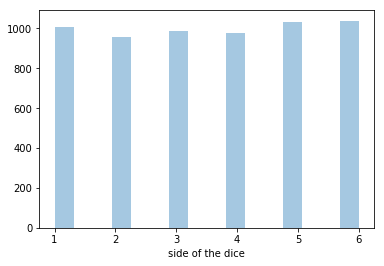

In [4]:
# getting dices again
valor_min = 1
valor_max = 6 + 1
# number of launchs
lançamentos = 6000
# ramdon integer results for all launchs
samples_uniforme = np.random.randint(low = valor_min,
                                     high = valor_max,
                                     size = lançamentos)
# graphical results
sns.distplot(samples_uniforme, axlabel = 'side of the dice', kde=False);

## Bernoulli Distributuion

It's a discrete distribution in sample space {0, 1} with value 1 with chance of success p and probability of failure q = 1 − p. 
The average in this distribution is always p and variance p(1-p).

In [7]:
from scipy.stats import bernoulli

print('Média Verdadeira: 0.7, Variância Verdadeira: 0.21')
for n in [3,10,10000,100000,10000000]:
    bern = bernoulli.rvs(p=0.7, size=n)
    print('\sample:', n,'  average:', bern.sum()/len(bern), '  var:', bern.std()**2)    

Média Verdadeira: 0.7, Variância Verdadeira: 0.21
\sample: 3   average: 0.6666666666666666   var: 0.2222222222222222
\sample: 10   average: 0.7   var: 0.20999999999999994
\sample: 10000   average: 0.6964   var: 0.21142703999999998
\sample: 100000   average: 0.70025   var: 0.2098999375000001
\sample: 10000000   average: 0.6997923   var: 0.21008303686071025


## Binomial Distribution

This is the discrete probability distributionin a sequence of n tries.
- just 02 possible outcomes (success and failure)
- constant probability
- each try is independent
- the desirable output is the number of success k in n tries.

\begin{equation*}
f(x)=  \binom {n}{x} (p)^x (1-p)^{(n-x)}
\end{equation*}

where **_x_** is the number of success, **_p_** is the probability of success, **_n_** is the number of tries.

Note: Bernoulli is a special case of binomial distrib., when n = 1 and average is np and variance is np(1-p).

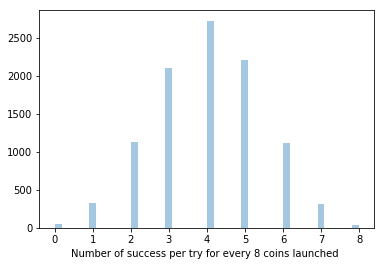

In [10]:
# HEAD & TAILS EXPERIMENT
# number of tries
quantidade_ensaios = 10000
# number of launchs per tries
lançamentos = 8
# probability of success
probabilidade_sucesso = 0.5
# binomial equation
samples_binomial = np.random.binomial(n = lançamentos, p = probabilidade_sucesso, size = quantidade_ensaios)

# plotting graph
eixo_x = 'Number of success per try for every 8 coins launched '
sns.distplot(samples_binomial, axlabel = eixo_x, kde = False);

## Poisson Distribution

This is a random probability discrete distribution that express itself as a series of events that may happen independently in a period of time (from the last event).<br>
It's parameter is $\lambda$ and it's always greater than zero.
**This indicates the average number of occurrences per event in continuum unit (space or time)**.<br> 
Example: event average occurrence is 4 minutes and we would like to find out the number of events in 10 minutes... For that, Poisson distrib with λ = 10/4 = 2.5.

\begin{equation*}
f(x)= e^{-\lambda} \dfrac{\lambda^x}{x!}
\end{equation*}

* $e$ is the natural log ($e$ = 2.71828...),
* ! is the factorial sign,

Examples:<br> 
- number of children from a couple, 
- number of clients in the morning of a store, 
- cars failure's in a given trajectory,
- phone calls per unit of time,
- accidents per unit of time,
- visible blood globulus per area in the microscope,
- radio particles emission per unit of time,

Note: average and variance is given per $\lambda$

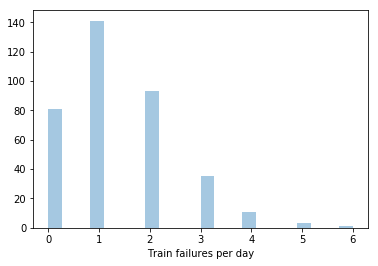

In [11]:
# setting the parameter of number of failures
parametro_lambda = 1.5
# instancing number of days
dias_contados = 365
# poisson fuction will return the number of failures per day
samples_poisson = np.random.poisson(lam = parametro_lambda, size = 365)

# plotting graph
eixo_x = 'Train failures per day'
sns.distplot(samples_poisson, axlabel = eixo_x, kde=False);

## Exponential Distribution

This distribution is the only one with constant failure rate. It has been used to shape the lifetime of a product and materials.
Hence, this continuum distribution can describe the probabilities in a period for a certain event to happen.
This one is very close to Poisson and their relationship can be associated to a stochastic process called 'Poisson Process'.
For x >= 0:

\begin{equation*}
f(x;\lambda)= \lambda e^{-\lambda x}
\end{equation*}

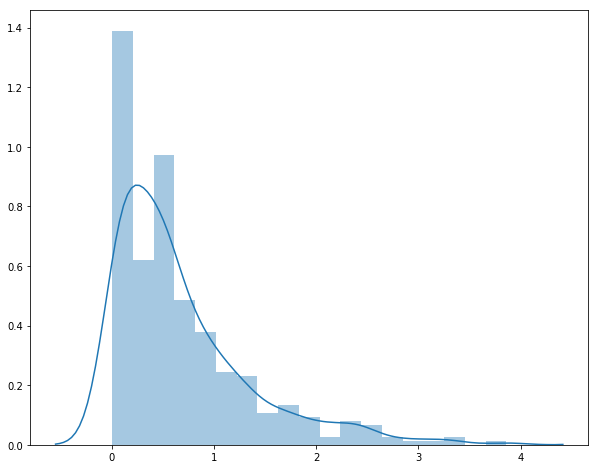

In [14]:
# setting the parameter of number of failures as the last example
parametro_lambda = 1.5
dias_contados = 365
# poisson returns the number of failures per day and the exponential the time for the next event
samples_exp = np.random.exponential(1/parametro_lambda, dias_contados)

# plotting graph
plt.figure(figsize=(10,8))
sns.distplot(samples_exp);

## Normal Distribution

The Gaussian Distribution, or Normal Distrib., can shape lots of nature's events. Under some circumstances some distributions may behave as Normal ones due to **Central Limit Theorem**.

A random variable _**X**_ is under a Normal Distribution **_X ~ N ( $\mu$, $\sigma$)_** if its occurrence probabilities are:

\begin{equation*}
p(x)= \dfrac{1}{\sqrt{2 \pi \sigma^²}} e^ \dfrac{-(x-\mu)^2}{2 \sigma^2}
\end{equation*}

For a Standard Normal Distribution, the average is 0 and the standard deviation is 1 (check for Z-score).

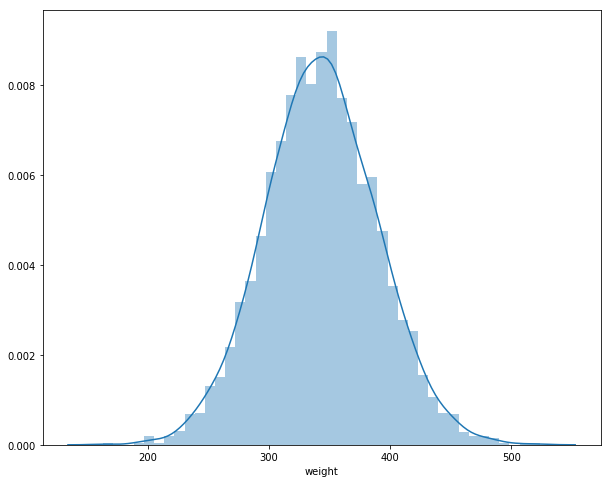

In [16]:
media = 342.73 # instancing average
desvio_padrão = 45.78 # instancing standard deviation
n_amostras = 3000 # quantity of samples in the population

# calling normal distribution function
samples_normal = np.random.normal(loc = media, scale = desvio_padrão, size = n_amostras)

# plotting graph
plt.figure(figsize=(10,8))
sns.distplot(samples_normal, axlabel = 'weight')
plt.show()

# ---------------------- STATISTICAL INFERENCES ----------------------

At first, checkout about bias, confidence interval, null and alternative hypothesis test.

### Average Test or T-Student
For Z test we have:
<br>
$$z=\frac{\overline x-\mu_0}{\sigma / \sqrt{n}}$$
<br>
where:
- ${\bar x}$ - average value of the hypothesis
- ${\mu_0}$ - average value of the sample
- ${\sigma}$ - sample's standard deviation
- ${n}$ - size of the sample

If we do not know the population's standard deviation, than we have to use the sample's one:
<br>
$$z=\frac{\overline x-\mu_0}{s / \sqrt{n}}$$
<br>
And the Sample's Standard Deviation will be:
<br>
$$s=\sqrt{\frac{\sum(x_i-\overline x)²}{n-1}}$$
<br>

### Testing Variance
*Ki-Squared* with $(n-1)$ freedom degrees
<br>
$$\chi^2 = \frac{(n-1)s^2}{\sigma_0}$$
<br>

### Testing proportions
The same test of averages, but for proportions though:
<br>
$$z=\frac{p\prime-p_0}{\sqrt{\frac{p_0-(1-p_0)}{n}}}$$
<br>